In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, plot_roc_curve
import seaborn as sns

In [ ]:
diabData = pd.read_csv("diabetes.csv")

diabData.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diabData.shape

(768, 9)

In [ ]:
# Divide the given columns into two types of variables dependent (or target variable) and 
# independent variable (or feature variables).

x = diabData.iloc[:,:-1]
y = diabData.iloc[:,-1]

x.shape, y.shape

((768, 8), (768,))

In [ ]:
# Divide the dataset into train & test sets in 75:25 ratio

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=0)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((576, 8), (192, 8), (576,), (192,))

In [ ]:
y_train = np.array(y_train).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)

y_train.shape, y_test.shape

((576, 1), (192, 1))

In [ ]:
# Create a Logistic Regression classifier object using Logistic Regression () function.

logModel = LogisticRegression()

In [ ]:
# Fit your model on the train set using fit () 

logModel.fit(x_train, y_train)

# Perform prediction on the test set using predict ().
y_pred = logModel.predict(x_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
# Evaluate your Model using Confusion Matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[115,  15],
       [ 25,  37]])

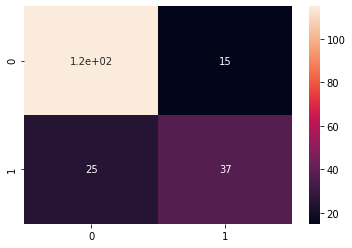

In [ ]:
# Visualize the confusion matrix using Heatmap.

sns.heatmap(cm, annot=True)

In [ ]:
# Evaluate the model using model evaluation metrics such as accuracy, precision, and recall.

report = classification_report(y_test, y_pred) 
print(report)

Outcome
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       130
           1       0.71      0.60      0.65        62

    accuracy                           0.79       192
   macro avg       0.77      0.74      0.75       192
weighted avg       0.79      0.79      0.79       192



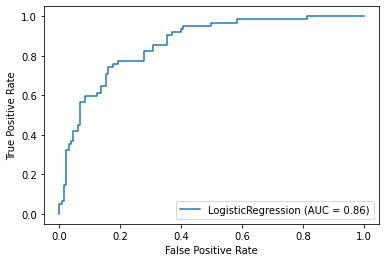

In [ ]:
# Plot a ROC Curve for your Model

plot_roc_curve(logModel, x_test, y_test)